# Autoencoders

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [65]:
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [66]:
input_dim = 784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [67]:
latent_dim = 32  

input_img = keras.Input(shape=(input_dim,))
encoded = layers.Dense(latent_dim, activation='relu')(input_img)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

Build Encoder, Decoder and Autoencoder models, using the Keras Functional API

In [68]:
# Autoencoder
autoencoder = keras.Model(input_img, decoded)
# Create the encoder model
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = autoencoder.layers[-1] # last layer of the autoencoder
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [69]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [70]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2267 - val_loss: 0.1582
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1414 - val_loss: 0.1257
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1186 - val_loss: 0.1103
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1074 - val_loss: 0.1023
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1012 - val_loss: 0.0977
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0977 - val_loss: 0.0952
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0958 - val_loss: 0.0940
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0949 - val_loss: 0.0933
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0942 - val_loss: 0.0927

Results visualization

In [71]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

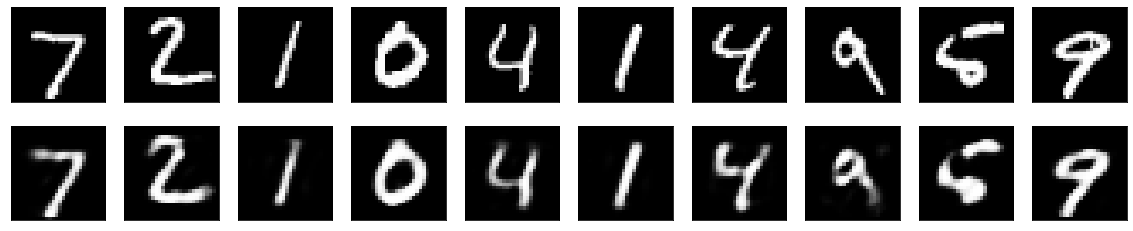

In [72]:
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising 

In [73]:
# Add noise to images

noise_factor = 0.4
x_train_noise  = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

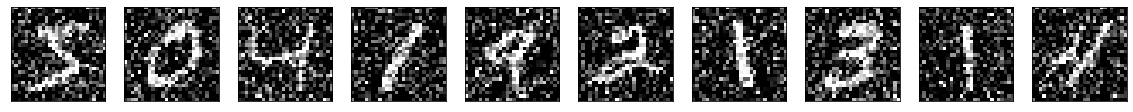

In [74]:
n = 10  # number of digits to display
plt.figure(figsize=(20, 2))
for i in range(n):
    
    # original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [75]:
# Build the Model
input_layer = keras.Input(shape=(input_dim,))
encoding_layer1 = layers.Dense(128, activation='relu')(input_layer)
encoding_layer2 = layers.Dense(64, activation='relu')(encoding_layer1)
encoding_layer3 = layers.Dense(latent_dim, activation='relu')(encoding_layer2)

decoding_layer1 = layers.Dense(64, activation='relu')(encoding_layer2)
decoding_layer2 = layers.Dense(128, activation='relu')(decoding_layer1)
output_decoding_layer = layers.Dense(input_dim, activation='sigmoid')(decoding_layer2)

autoencoder = keras.Model(input_layer, output_decoding_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [76]:
autoencoder.fit(x_train_noise, x_train, epochs=10, batch_size=128, shuffle=True, validation_split = 0.15)

Epoch 1/10
399/399 [==============================] - 2s 3ms/step - loss: 0.2251 - val_loss: 0.1658
Epoch 2/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1540 - val_loss: 0.1457
Epoch 3/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1395 - val_loss: 0.1348
Epoch 4/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1308 - val_loss: 0.1295
Epoch 5/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1255 - val_loss: 0.1245
Epoch 6/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1220 - val_loss: 0.1214
Epoch 7/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1193 - val_loss: 0.1192
Epoch 8/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1173 - val_loss: 0.1172
Epoch 9/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1153 - val_loss: 0.1162
Epoch 10/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1138 - val_loss: 0.1146

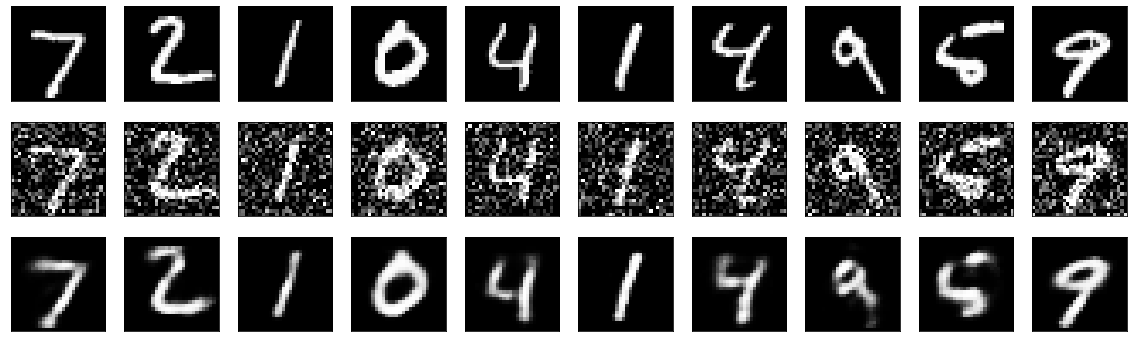

In [77]:
n = 10  # number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # noised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # denoised
    ax = plt.subplot(3, n, i + 1 + n * 2)
    plt.imshow(output_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()